In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_dir = "/content/gdrive/My Drive/"

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

import os
import matplotlib.pyplot as plt
import numpy as np
import glob2
from sklearn.preprocessing import LabelEncoder
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
film_stars=root_dir+'/Colab Notebooks/Famous Bengali Filmstars BigData/train'

In [ ]:
film_stars

'/content/gdrive/My Drive//Colab Notebooks/Famous Bengali Filmstars BigData/train'

In [ ]:
files = glob2.glob(film_stars+'/**', recursive=True) 
print('total files=', len(files))

total files= 4411


In [ ]:
afsana_files = [fn for fn in files if 'afsana.' in fn]
asaduzzaman_files = [fn for fn in files if 'asaduzzaman.' in fn]
chanchal_files = [fn for fn in files if 'chanchal.' in fn]
humayun_files = [fn for fn in files if 'humayun.' in fn]
mithun_files = [fn for fn in files if 'mithun.' in fn]
sabyasachi_files = [fn for fn in files if 'sabyasachi.' in fn]
shuborna_files = [fn for fn in files if 'shuborna.' in fn]
soumitra_files = [fn for fn in files if 'soumitra.' in fn]
suchitra_files = [fn for fn in files if 'suchitra.' in fn]
uttam_files = [fn for fn in files if 'uttam.' in fn]
zahid_files = [fn for fn in files if 'zahid.' in fn]

print('afsana files :', len(afsana_files),
      'asaduzzaman files :',len(asaduzzaman_files),
      'chanchal files :', len(chanchal_files),
      'humayun files :', len(humayun_files),
      'mithun files :', len(mithun_files),
      'sabyasachi files :', len(sabyasachi_files),
      'shuborna files :', len(shuborna_files),
      'soumitra files :', len(soumitra_files),
      'suchitra files :', len(suchitra_files),
      'uttam files :', len(uttam_files),
      'zahid files :', len(zahid_files)
      )

afsana files : 400 asaduzzaman files : 400 chanchal files : 400 humayun files : 400 mithun files : 400 sabyasachi files : 400 shuborna files : 400 soumitra files : 400 suchitra files : 400 uttam files : 400 zahid files : 400


In [ ]:
n=400

afsana_files=np.array(afsana_files[:n])
asaduzzaman_files=np.array(asaduzzaman_files[:n])
chanchal_files=np.array(chanchal_files[:n])
humayun_files=np.array(humayun_files[:n])
mithun_files=np.array(mithun_files[:n])
sabyasachi_files=np.array(sabyasachi_files[:n])
shuborna_files=np.array(shuborna_files[:n])
soumitra_files=np.array(soumitra_files[:n])
suchitra_files=np.array(suchitra_files[:n])
uttam_files=np.array(uttam_files[:n])
zahid_files=np.array(zahid_files[:n])


In [ ]:
print('afsana files :', len(afsana_files),
      'asaduzzaman files :',len(asaduzzaman_files),
      'chanchal files :', len(chanchal_files),
      'humayun files :', len(humayun_files),
      'mithun files :', len(mithun_files),
      'sabyasachi files :', len(sabyasachi_files),
      'shuborna files :', len(shuborna_files),
      'soumitra files :', len(soumitra_files),
      'suchitra files :', len(suchitra_files),
      'uttam files :', len(uttam_files),
      'zahid files :', len(zahid_files)
      )

afsana files : 400 asaduzzaman files : 400 chanchal files : 400 humayun files : 400 mithun files : 400 sabyasachi files : 400 shuborna files : 400 soumitra files : 400 suchitra files : 400 uttam files : 400 zahid files : 400


In [ ]:
train_size=240
val_size=80
test_size=80


afsana_indices = np.random.permutation(n)
asaduzzaman_indices = np.random.permutation(n)
chanchal_indices = np.random.permutation(n)
humayun_indices = np.random.permutation(n)
mithun_indices = np.random.permutation(n)
sabyasachi_indices = np.random.permutation(n)
shuborna_indices = np.random.permutation(n)
soumitra_indices = np.random.permutation(n)
suchitra_indices = np.random.permutation(n)
uttam_indices = np.random.permutation(n)
zahid_indices = np.random.permutation(n)

train_files=np.concatenate([afsana_files[afsana_indices[0:train_size]],
                            asaduzzaman_files[asaduzzaman_indices[0:train_size]],
                            chanchal_files[chanchal_indices[0:train_size]],
                            humayun_files[humayun_indices[0:train_size]],
                            mithun_files[mithun_indices[0:train_size]],
                            sabyasachi_files[sabyasachi_indices[0:train_size]],
                            shuborna_files[shuborna_indices[0:train_size]],
                            soumitra_files[soumitra_indices[0:train_size]],
                            suchitra_files[suchitra_indices[0:train_size]],
                            uttam_files[uttam_indices[0:train_size]],
                            zahid_files[zahid_indices[0:train_size]]
                            ])



val_files=np.concatenate([afsana_files[afsana_indices[train_size:train_size+val_size]],
                            asaduzzaman_files[asaduzzaman_indices[train_size:train_size+val_size]],
                            chanchal_files[chanchal_indices[train_size:train_size+val_size]],
                            humayun_files[humayun_indices[train_size:train_size+val_size]],
                            mithun_files[mithun_indices[train_size:train_size+val_size]],
                            sabyasachi_files[sabyasachi_indices[train_size:train_size+val_size]],
                            shuborna_files[shuborna_indices[train_size:train_size+val_size]],
                            soumitra_files[soumitra_indices[train_size:train_size+val_size]],
                            suchitra_files[suchitra_indices[train_size:train_size+val_size]],
                            uttam_files[uttam_indices[train_size:train_size+val_size]],
                            zahid_files[zahid_indices[train_size:train_size+val_size]]
                            ])



test_files=np.concatenate([afsana_files[afsana_indices[-test_size:]],
                            asaduzzaman_files[asaduzzaman_indices[-test_size:]],
                            chanchal_files[chanchal_indices[-test_size:]],
                            humayun_files[humayun_indices[-test_size:]],
                            mithun_files[mithun_indices[-test_size:]],
                            sabyasachi_files[sabyasachi_indices[-test_size:]],
                            shuborna_files[shuborna_indices[-test_size:]],
                            soumitra_files[soumitra_indices[-test_size:]],
                            suchitra_files[suchitra_indices[-test_size:]],
                            uttam_files[uttam_indices[-test_size:]],
                            zahid_files[zahid_indices[-test_size:]]
                            ])


print('Train, Validation, Test: ',train_files.shape, val_files.shape, test_files.shape)

Train, Validation, Test:  (2640,) (880,) (880,)


In [ ]:
IMG_DIM = (150, 150)
train_imgs =np.array( [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files] )/255.0
print('train_imgs_shape:',train_imgs.shape)

train_imgs_shape: (2640, 150, 150, 3)


In [ ]:
val_imgs =np.array( [img_to_array(load_img(img, target_size=IMG_DIM)) for img in val_files] )/255.0
print('validation_imgs_shape:',val_imgs.shape)

validation_imgs_shape: (880, 150, 150, 3)


In [15]:
test_imgs =np.array( [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files] )/255.0
print('test_imgs_shape:',test_imgs.shape)

test_imgs_shape: (880, 150, 150, 3)


In [16]:
print(f'shapes: {train_imgs.shape}  {val_imgs.shape}  {test_imgs.shape}')

shapes: (2640, 150, 150, 3)  (880, 150, 150, 3)  (880, 150, 150, 3)


In [17]:
print(train_files[0])
train_files[0].split('/')[-1]

/content/gdrive/My Drive//Colab Notebooks/Famous Bengali Filmstars BigData/train/Afsana Mimi/afsana.207.jpg


'afsana.207.jpg'

In [18]:
train_labels=[ file.split('/')[-1].split('.')[0] for file in train_files]
val_labels=[ file.split('/')[-1].split('.')[0] for file in val_files]
test_labels=[ file.split('/')[-1].split('.')[0] for file in test_files]

print( train_labels[0:10])
print(val_labels[0:10])
print(test_labels[0:10])

['afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana']
['afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana']
['afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana', 'afsana']


In [19]:
#name to number
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(val_labels)
test_labels_enc = le.transform(test_labels)

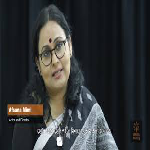

In [20]:
array_to_img(train_imgs[2])

In [128]:
input_shape = (150, 150, 3)
model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh',   input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=(3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='tanh'))
#model.add(Dense(1000, activation='tanh'))

model.add(Dense(11, activation='softmax'))   # for binary classification. for multiclass, softmax.


model.compile(loss='sparse_categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 146, 146, 16)      1216      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 73, 73, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 71, 71, 64)        9280      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 35, 35, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 35, 35, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 33, 33, 64)       

In [106]:
history = model.fit(x=train_imgs, y=train_labels_enc,
                    validation_data=(val_imgs, validation_labels_enc),
                    batch_size=30,
                    epochs=50,
                    verbose=1)

Epoch 1/50
88/88 [==============================] - 49s 53ms/step - loss: 2.4292 - accuracy: 0.2864 - val_loss: 1.7291 - val_accuracy: 0.4420
Epoch 2/50
88/88 [==============================] - 4s 49ms/step - loss: 1.3766 - accuracy: 0.5617 - val_loss: 1.2375 - val_accuracy: 0.5955
Epoch 3/50
88/88 [==============================] - 4s 49ms/step - loss: 1.0878 - accuracy: 0.6659 - val_loss: 1.3347 - val_accuracy: 0.5955
Epoch 4/50
88/88 [==============================] - 4s 49ms/step - loss: 0.8361 - accuracy: 0.7455 - val_loss: 1.3557 - val_accuracy: 0.6148
Epoch 5/50
88/88 [==============================] - 4s 49ms/step - loss: 0.6607 - accuracy: 0.7898 - val_loss: 1.0609 - val_accuracy: 0.7170
Epoch 6/50
88/88 [==============================] - 4s 49ms/step - loss: 0.5005 - accuracy: 0.8402 - val_loss: 0.9936 - val_accuracy: 0.7591
Epoch 7/50
88/88 [==============================] - 4s 49ms/step - loss: 0.3395 - accuracy: 0.8890 - val_loss: 0.9914 - val_accuracy: 0.7602
Epoch 8/50
8

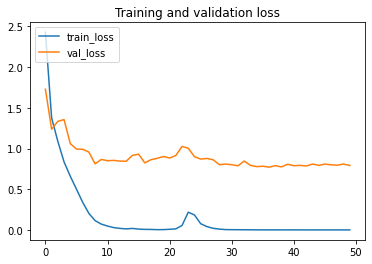

In [107]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title('Training and validation loss')
plt.legend(loc="upper left")
plt.show()

In [108]:
loss, acc=model.evaluate(test_imgs, test_labels_enc)
print(f'test accuracy {acc}')

28/28 [==============================] - 1s 21ms/step - loss: 0.7184 - accuracy: 0.8602
test accuracy 0.8602272868156433


In [122]:
class_dict = {'Afsana Mimi': 0,
 'Asaduzzaman Noor': 1,
 'Chanchal Chowdhury': 2,
 'Humayun Faridi': 3,
 'Mithun Chakraborty': 4,
 'Sabyasachi Chakrabarty': 5,
 'Shuborna Mustafa': 6,
 'Soumitra Chatterjee': 7,
 'Suchitra Sen': 8,
 'Uttam Kumar': 9,
 'Zahid Hasan': 10}

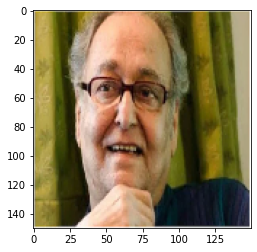

Soumitra Chatterjee


In [123]:
img = load_img(root_dir+'/Colab Notebooks/Famous Bengali Filmstars BigData/test/soumitra2.png', target_size=(150,150))
plt.imshow(img)
plt.show()

X= img_to_array(img)
X = np.expand_dims(X,axis =0)
images = np.vstack([X])
val = model.predict(images)
predicted_class = np.argmax(val)
for key,value in class_dict.items():
  if(value == predicted_class):
    print(key)

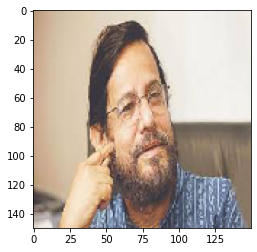

Asaduzzaman Noor


In [124]:
img = load_img(root_dir+'/Colab Notebooks/Famous Bengali Filmstars BigData/test/noor2.jpg', target_size=(150,150))
plt.imshow(img)
plt.show()

X= img_to_array(img)
X = np.expand_dims(X,axis =0)
images = np.vstack([X])
val = model.predict(images)
predicted_class = np.argmax(val)
for key,value in class_dict.items():
  if(value == predicted_class):
    print(key)

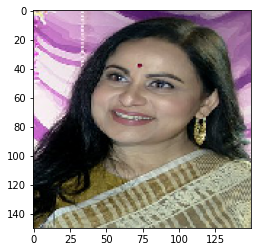

Afsana Mimi


In [125]:
img = load_img(root_dir+'/Colab Notebooks/Famous Bengali Filmstars BigData/test/afsana1.jpg', target_size=(150,150))
plt.imshow(img)
plt.show()

X= img_to_array(img)
X = np.expand_dims(X,axis =0)
images = np.vstack([X])
val = model.predict(images)
predicted_class = np.argmax(val)
for key,value in class_dict.items():
  if(value == predicted_class):
    print(key)

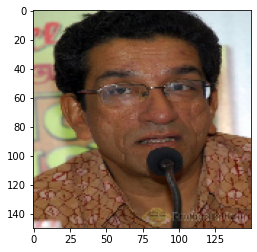

Sabyasachi Chakrabarty


In [126]:
img = load_img(root_dir+'/Colab Notebooks/Famous Bengali Filmstars BigData/test/sabyasachi1.jpg', target_size=(150,150))
plt.imshow(img)
plt.show()

X= img_to_array(img)
X = np.expand_dims(X,axis =0)
images = np.vstack([X])
val = model.predict(images)
predicted_class = np.argmax(val)
for key,value in class_dict.items():
  if(value == predicted_class):
    print(key)

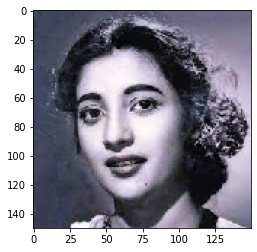

Suchitra Sen


In [127]:
img = load_img(root_dir+'/Colab Notebooks/Famous Bengali Filmstars BigData/test/suchitra2.jpg', target_size=(150,150))
plt.imshow(img)
plt.show()

X= img_to_array(img)
X = np.expand_dims(X,axis =0)
images = np.vstack([X])
val = model.predict(images)
predicted_class = np.argmax(val)
for key,value in class_dict.items():
  if(value == predicted_class):
    print(key)